In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Code Stuff/python-training/HW-07-10/Aggregate Functions/marks.csv')
df

,student,marks,IQ
0,1,60,198
1,2,57,162
2,3,15,106
3,4,46,182
4,5,8,117
...,...,...,...
995,996,88,168
996,997,36,149
997,998,18,63
998,999,16,165


In [4]:
df['marks'].sum()

51323

In [5]:
df['marks'].mean()

51.323

In [6]:
df['marks'].median()

50.0

In [7]:
df['marks'].min()

1

In [8]:
df['marks'].max()

100

In [9]:
df['marks'].count()

1000

In [10]:
df['marks'].std()

28.95366964628121

In [11]:
df['marks'].var()

838.3149859859858

In [12]:
#agg(): Allows you to apply multiple aggregate functions simultaneously.
df['marks'].agg(['sum', 'mean', 'median'])

sum       51323.000
mean         51.323
median       50.000
Name: marks, dtype: float64

In [13]:
df['marks'].quantile(0.01)

3.0

In [14]:
#idxmax(): Returns the index of the first occurrence of the maximum value.
df['marks'].idxmax()

5

In [15]:
#idxmin(): Returns the index of the first occurrence of the minimum value
df['marks'].idxmin()

943

In [16]:
df['marks'].mode()

0    100
Name: marks, dtype: int64

In [17]:
df['marks'].cov(df['IQ'])

-0.06417717717719294

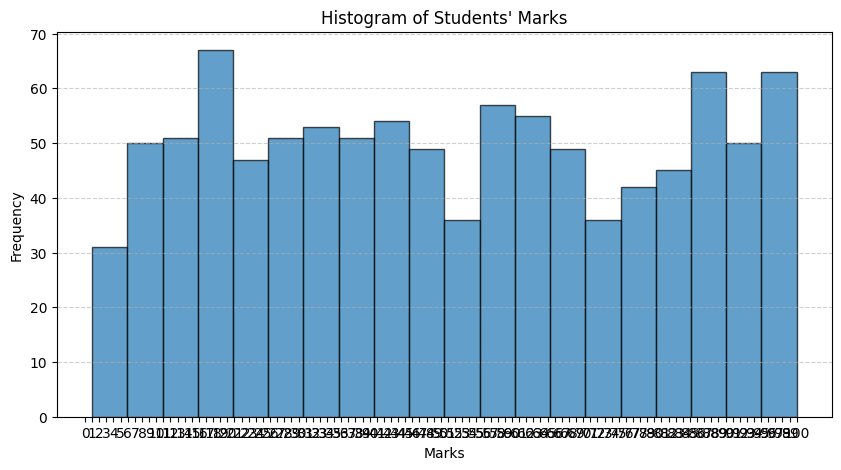

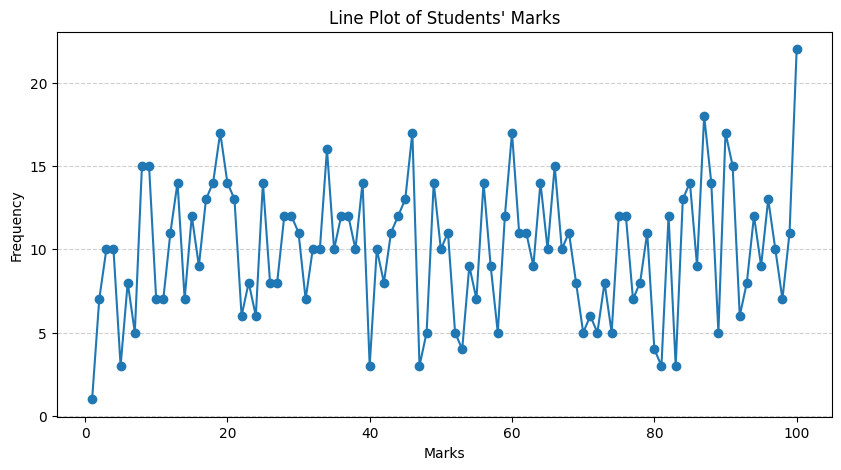

In [18]:
# Plot a histogram
plt.figure(figsize=(10, 5))
plt.hist(df['marks'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Students\' Marks')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(0, 101, 1))
plt.show()

# Plot a line plot (sorted by marks)
sorted_df = df['marks'].value_counts().sort_index().reset_index()
sorted_df.columns = ['marks', 'Frequency']

plt.figure(figsize=(10, 5))
plt.plot(sorted_df['marks'], sorted_df['Frequency'], marker='o', linestyle='-')
plt.title('Line Plot of Students\' Marks')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [25]:
df[(df.marks >= 99)]['IQ'][(df.IQ > 100)]

54     124
80     133
88     114
91     107
180    136
217    118
251    117
359    134
372    124
391    181
448    103
479    137
525    159
585    129
776    141
937    155
957    148
Name: IQ, dtype: int64

In [28]:
# Define a custom function to create groups based on IQ and Marks
def create_groups(row):
    if row['IQ'] < 50 and row['marks'] < 50:
        return 'Low IQ and Low Marks'
    elif row['IQ'] < 50 and row['marks'] >= 50:
        return 'Low IQ and High Marks'
    elif row['IQ'] >= 50 and row['marks'] < 50:
        return 'High IQ and Low Marks'
    else:
        return 'High IQ and High Marks'

# Apply the custom function to create a new 'Group' column
df['Group'] = df.apply(create_groups, axis=1)

# Group by the 'Group' column and count the number of students in each group
grouped_df = df.groupby('Group').size().reset_index(name='Count')
grouped_df

,Group,Count
0,High IQ and High Marks,441
1,High IQ and Low Marks,435
2,Low IQ and High Marks,65
3,Low IQ and Low Marks,59
